#Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Test set Image Processing

In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
   '/content/drive/MyDrive/archive (3)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7527 files belonging to 8 classes.


#Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/archive (3)/trained_model (3).h5')

In [5]:
import os

# Directory path where your images are stored
folder_path = '/content/drive/MyDrive/archive (3)/MixFruitTest'

# List to store image filenames
image_filenames = []

# Iterate through all files in the directory
for filename in os.listdir(folder_path):
    # Check if the file is an image (you can specify different image formats if needed)
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Append the image filename to the list
        image_filenames.append(filename)



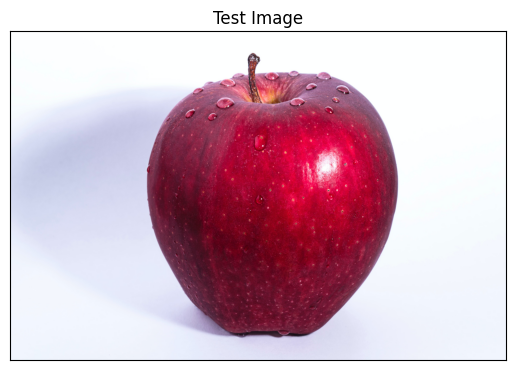

1/1 [==============================] - 0s 36ms/step
6
It's a Pomegranate_Bad


In [6]:
#Test Image Visualization
import cv2
import numpy as np
import time
from IPython.display import clear_output


for image in image_filenames:
  image_path = str('/content/drive/MyDrive/archive (3)/MixFruitTest/'+image)
  # Reading an image in default mode
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
  # Displaying the image
  plt.imshow(img)
  plt.title('Test Image')
  plt.xticks([])
  plt.yticks([])
  plt.show()
  image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = cnn.predict(input_arr)
  result_index = np.argmax(predictions) #Return index of max element
  print(result_index)
  #Single image Prediction
  print("It's a {}".format(test_set.class_names[result_index]))
  time.sleep(5)
  clear_output(wait=True)